<a href="https://colab.research.google.com/github/kenneth-craig/academyPub/blob/main/Time%20Series%20Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
file = files.upload()


Saving shampoo-sales.csv to shampoo-sales.csv


In [12]:
!pip install -U statsmodels
#!python --version

# Steps to be Followed for Time Series Analysis

Determine if Time Series is stationary, if not the differencing will be required to make stationary.

Autocorrelation using pd.lag_plot() can be run on time series data or pd.corr() to confirm if stationary.

Autocorrelation can be checked for ALL lag values using pd.autocorrelation_plot() or statsmodels.plot_acf()

Line plot of Forecast Residual errors

Histogram & Density plot of Forecast Residual errors (check if Residual Error is Guassian like)

Residual Error Autocorrelation Plot

Q-Q Plot of Forecast Residual errors

Check for Correlation (p-value)
Check for Overfitting & Residual Errors

Identify if Time Series is Stationary or non-Sytationary (Unit root test)

The parameters of the the ARIMA (p, d, q) model being used:
- p is The number of lag observations included in the model i.e. lag order
- d is The number of times that the raw observations are differenced i.e.degree of differencing
- q is The size of moving average window i.e. order of moving average

Predict residual error using ARIMA model and adjust modelled prediction accordingly.

# Grid Search to Inerate ARIMA parameters for p, d, q

In [18]:
import warnings
from datetime import datetime
from math import sqrt
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# evaluate an ARIMA model for a given order (p, d, q)
def evaluate_arima_model(X, arima_order):
  # prepare training dataset
  train_size = int(len(X) * 0.66)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train]
  # make predictions
  predictions = list()
  for t in range(len(test)):
    model = ARIMA(history, order=arima_order)
    model_fit = model.fit()
    yhat = model_fit.forecast()
    predictions.append(yhat)
    history.append(test[t])

  # calculate out of sample error
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse

# evaluate combinations of p, d, q values for ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
  # If data is not floating point this can cause ARIMA procedure to fail
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  for p in p_values:
    for d in d_values:
      for q in q_values:
        order = (p, d, q)
        try:
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE=%.3f' % (order, rmse))
        except:
          continue
  print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# main calling procedure
# load_dataset
def dt_parse(x):
  return datetime.strptime('202'+x, '%Y-%m').date()

#series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=dt_parse)
series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=dt_parse)

# evaluate pararmeters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0,3)
q_values= range(0, 3)
# Disable Warnings form Code Libraries reporting DLASCL warning
warnings.filterwarnings("ignore")
evaluate_models(series.values, p_values, d_values, q_values)


ARIMA(0, 0, 0) RMSE=228.966
ARIMA(0, 0, 1) RMSE=195.596
ARIMA(0, 0, 2) RMSE=154.886
ARIMA(0, 1, 0) RMSE=133.156
ARIMA(0, 1, 1) RMSE=104.077
ARIMA(0, 1, 2) RMSE=68.345
ARIMA(0, 2, 0) RMSE=255.187
ARIMA(0, 2, 1) RMSE=134.168
ARIMA(0, 2, 2) RMSE=74.644
ARIMA(1, 0, 0) RMSE=152.028
ARIMA(1, 0, 1) RMSE=111.788
ARIMA(1, 0, 2) RMSE=77.002
ARIMA(1, 1, 0) RMSE=88.631
ARIMA(1, 1, 1) RMSE=87.942
ARIMA(1, 1, 2) RMSE=90.986
ARIMA(1, 2, 0) RMSE=134.576
ARIMA(1, 2, 1) RMSE=86.157
ARIMA(1, 2, 2) RMSE=65.511
ARIMA(2, 0, 0) RMSE=100.879
ARIMA(2, 0, 1) RMSE=98.953
ARIMA(2, 0, 2) RMSE=98.689
ARIMA(2, 1, 0) RMSE=85.063
ARIMA(2, 1, 1) RMSE=88.428
ARIMA(2, 1, 2) RMSE=83.496
ARIMA(2, 2, 0) RMSE=97.829
ARIMA(2, 2, 1) RMSE=76.847
ARIMA(2, 2, 2) RMSE=80.808
ARIMA(4, 0, 0) RMSE=100.974
ARIMA(4, 0, 1) RMSE=101.480
ARIMA(4, 0, 2) RMSE=96.792
ARIMA(4, 1, 0) RMSE=95.068
ARIMA(4, 1, 1) RMSE=84.818
ARIMA(4, 1, 2) RMSE=84.205
ARIMA(4, 2, 0) RMSE=85.397
ARIMA(4, 2, 1) RMSE=74.219
ARIMA(4, 2, 2) RMSE=70.142
ARIMA(6, 0, 0) 

Rolling Forcast with ARIMA Model

predicted=343.272180, expected=342.300000
predicted=293.329675, expected=339.700000
predicted=368.668956, expected=440.400000
predicted=335.044741, expected=315.900000
predicted=363.220222, expected=439.300000
predicted=357.645324, expected=401.300000
predicted=443.047835, expected=437.400000
predicted=378.365674, expected=575.500000
predicted=459.415021, expected=407.600000
predicted=526.890876, expected=682.000000
predicted=457.231275, expected=475.300000
predicted=672.914943, expected=581.300000
predicted=531.541449, expected=646.900000
Test RMSE: 89.021


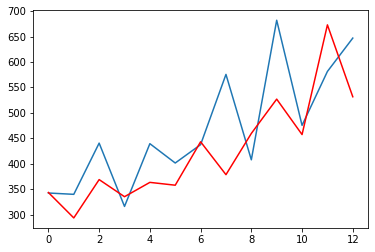

In [16]:
# Simple ARIMA model with p=5 (lags) d=1 (difference) q=0 (window)
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def dt_parse(x):
  return pd.datetime.strptime('202'+x, '%Y-%m')

series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=dt_parse)
series.index = series.index.to_period('M')

# split into train and test sets
X = series.values
train_size = int(len(X) * 0.66)
train, test = X[0:train_size], X[train_size:len(X)]
history = [x for x in train]
predictions = list()

# walk-forward validation
for t in range(len(test)):
  # lags=5, difference=1, MA window=0
  model = ARIMA(history, order=(5,1,0)) 
  model_fit = model.fit()
  output = model_fit.forecast()
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


# Autoregression Model

Coefficients: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
predicted=11.871275, expected=12.900000
predicted=13.053794, expected=14.600000
predicted=13.532591, expected=14.000000
predicted=13.243126, expected=13.600000
predicted=13.091438, expected=13.500000
predicted=13.146989, expected=15.700000
predicted=13.176153, expected=13.000000
Test RMSE: 1.225


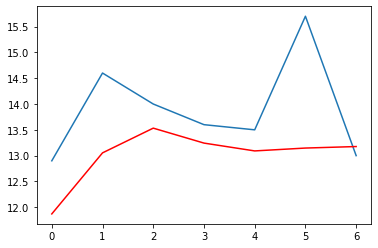

In [ ]:
# Create and evaluate a Static Autoregressive model & compare results with Performance of Baseline model (Persistence model) below
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

# Step 1: Not necessary to create a lag dataset by transforming data into a Supervised Learning Problem
# load dataset
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# Step 2: Separate dataset into Train and Test sets
# Split Dataset for last 7 days
X = series.values
train_size = len(X) - 7
train, test = X[1:train_size], X[train_size:]

# Step 3: Train & Evaluate Predictions
# Train Autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

# Make Predictions
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range (len(predictions)):
  print('predicted=%f, expected=%f' % (predictions[i], test[i]))

#Step 4: Plot Predictions & expected results
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' %rmse)

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()


# Autoregression of Forecast Residual Error

In [ ]:
# Autorgression of Residual Error
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg

# Step 1 Transform data into Supervised Learning Problem
series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
# create lagged data
values = pd.DataFrame(series.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']

# Separate datasets into Train & Test, X & y
X = df.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:, 0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# Step 3: Persistence Algorithm
def model_persistence (x):
  return (x)

# Step 4: Train & Evaluate model
train_predictions = list()
for x in train_X:
  yhat = model_persistence(x)
  train_predictions.append(yhat)

# Calcualte residual (expected - predicted)
train_residuals = [train_y[i] - train_predictions[i] for i in range (len(train_predictions))]

# Model forecast residual errors on Train data set residual errors
window =15
model = AutoReg(train_residuals, lags=window)
model_fit = model.fit()
coef = model_fit.params

# walk forward over time steps in test
history = train_residuals[len(train_residuals)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test_y)):
  # persistence
  yhat = test_X[t]
  error = test_y[t] - yhat
  # predict error
  length = len(history)
  lag = [history[i] for i in range(length-window, length)]
  pred_error = coef[0]
  for d in range(window):
    pred_error += coef[d+1] * lag[window-d-1]
  yhat = yhat + pred_error
  predictions.append(yhat)
  history.append(error)
  print('predicted=%f, expected=%f' % (yhat, test_y[t]))
# error
rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RMSE: %3f' % rmse)
# plot predicted error
pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()


# Forecast Performance Baseline Model (Ch 18)

A baseline performance gives you an idea of how well all other models will actually perform on your problem and provides a point of reference fpr all other modeling techniques on your problem. A baseline must be easy to implement and naive of problem-specific details i.e. Simple, Fast, Repeatable.
- Step 1: Transform the dataset into a Supervised Learning Problem
- Step 2: Separate dataset into Train and Test sets
- Step 3: Persistence Algorithm (simplest model possible)
- Step 4: Make & Evaluate Predictions
- Step 5: Plot predictions & expected results

      t   t+1
0   NaN  20.7
1  20.7  17.9
2  17.9  18.8
3  18.8  14.6
4  14.6  15.8
              0
count  7.000000
mean   0.428571
std    1.943977
min   -2.700000
25%   -0.500000
50%   -0.100000
75%    1.950000
max    2.900000
Test RSME: 1.850


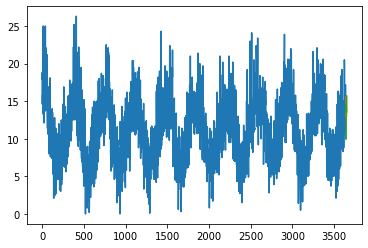

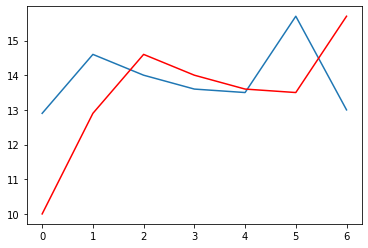

In [ ]:
# naive (simple) persistence forecast model
from sklearn import metrics
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from math import sqrt

# load dataset
def dt_parser(x):
  return pd.datetime.strptime('220'+x, '%Y-%m')
  
#series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, date_parser=dt_parser, squeeze=True)
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# Step 1: Create lagged dataset
values = pd.DataFrame(series.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']
print(df.head(5))

# Step 2: Split into train and test sets
X = df.values
# Train size of 66.667% for shampoo sales example
train_size = int(len(X) * 0.66)
# Train size; last 7 records for min daily temperature example
train_size = len(X) - 7

train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# Step 3: Persistence Model (basic model i.e. simplest model possible)
def model_persistence(x):
  return(x)

# Step 4: Make predictions & evaluate results - walk-forward validation
# no training required due to simple algorithm
predictions = list()
for x in test_X:
  yhat = model_persistence(x)
  predictions.append(yhat)

# Calculate Error Statistics (expected - predicted)
residuals = [test_y[i] - predictions[i] for i in range(len(predictions))]
residuals = pd.DataFrame(residuals)
print(residuals.describe())

rmse = sqrt(mean_squared_error(test_y, predictions))
print('Test RSME: %.3f' % rmse)

# Step 5: Plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()

pyplot.plot(test_y)
pyplot.plot(predictions, color='red')
pyplot.show()


           t      t+1
t    1.00000  0.77487
t+1  0.77487  1.00000


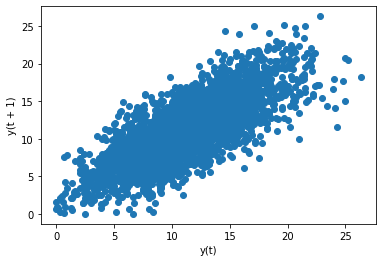

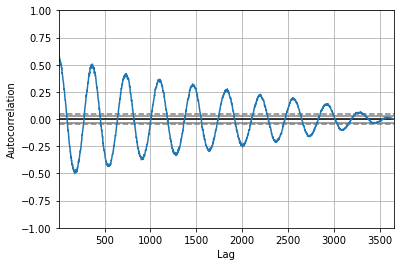

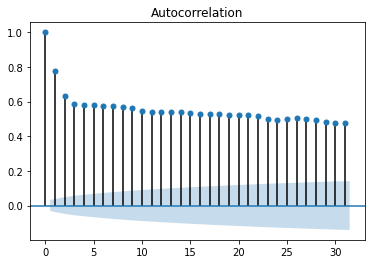

In [ ]:
# Quick check for Autocorrelation
import pandas as pd
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0,parse_dates=True, squeeze=True)

# Plot indivudal correlation results i.e. t & t+1
values = pd.DataFrame(series.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']
result = df.corr()
print(result)

# Clearly there is a relationship between current value and previous value in the case of daily-minimum temperatures
pd.plotting.lag_plot(series)
pyplot.show()
pd.plotting.autocorrelation_plot(series)
pyplot.show()
plot_acf(series, lags=31)
pyplot.show()



# Visualise Residual Forecast Errors ( Ch 19)

      0
0   9.0
1 -10.0
2   3.0
3  -6.0
4  30.0
                0
count  125.000000
mean     0.064000
std      9.187776
min    -28.000000
25%     -6.000000
50%     -1.000000
75%      5.000000
max     30.000000


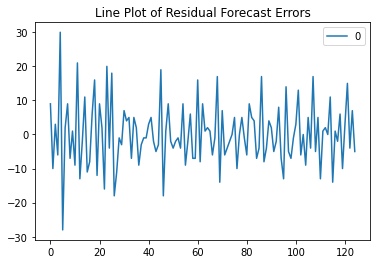

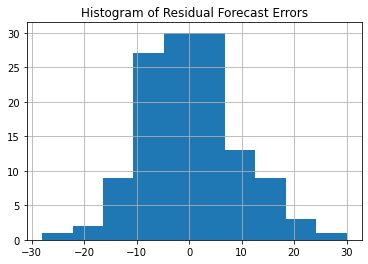

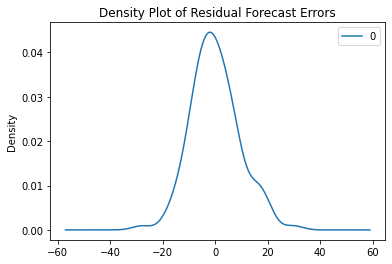

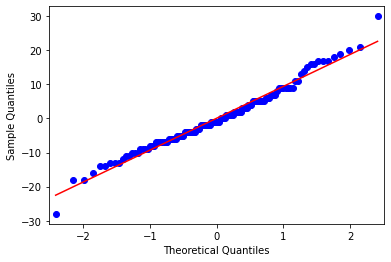

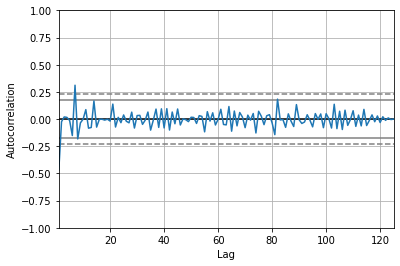

In [ ]:
# Techniques for Better Understanding Forecast Errors
import pandas as pd
from matplotlib import pyplot
import numpy as np
from statsmodels.graphics.gofplots import qqplot

series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# First we need to obtain some results i.e. residuals

# Step 1: Create lag dataset
values = pd.DataFrame(series.values)
df = pd.concat([values.shift(1), values], axis=1)
df.columns = ['t', 't+1']

# Step 2: Split into train and test sets
train_size = int(len(df) * 0.66)
X = df.values
train, test = X[0:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

# Step 3: Persistence Model
def model_persistence(x):
  return(x)

# Step 4: Make predictions & evaluate model - no need to train persistence model
# Walk Forwards Validation
predictions = list()
for x in test_X:
  yhat = model_persistence(x)
  predictions.append(yhat)

# Calculate error statistics - residual forecast errors
# Error plot should centre around 0 and a random plot i.e. no trends, seasonal or cyclic structures
residuals = [test_y[i] - predictions[i] for i in range(len(predictions))]
df_residuals = pd.DataFrame(residuals)
print(df_residuals.head())

# Summary statistics
# Should show  a mean error value close to zero
print(df_residuals.describe())

# Plot of Residual Forecast Errors
df_residuals.plot()
pyplot.legend()
pyplot.title('Line Plot of Residual Forecast Errors')
pyplot.show()

# Histogram & Density Plot of Residual Forecast Errors
# Should follow Normal Distrubtion Curve with mean centred around zero mean
df_residuals.hist()
pyplot.title('Histogram of Residual Forecast Errors')
pyplot.show()

# Distribution is more pointy indicating an expoenential distribtuion with some asymmetry
df_residuals.plot(kind='kde')
pyplot.title('Density Plot of Residual Forecast Errors')
pyplot.show()

# Quantile plot for showing deviations from normal distribution
np_residuals = np.array(residuals)
qqplot(np_residuals, line='r')
pyplot.show()

# Autocorrelations between residual forecast errors and previous step values.
# we would not expect there to be any correlation between residuals
pd.plotting.autocorrelation_plot(df_residuals)
pyplot.show()

# Forecasting Performance Metrics

**Useful Perormance Measures**
Forecast error (Residual Forecast Error)
- forecast_error = expected_value - predicted_value
- e = y - yhat

Mean Forecast Error (Forecast Bias)
- mean_forecast_error = sum(forecast_error)/total_no_samples
- mean_forecast_error = mean(forecast_error)

Mean absolute Error (MAE)
- MAE = sum(abs(forecast_error))/total_no_samples
- MAE = mean(abs(forecast_error))

Mean Squared Error (MSE)
- MSE = sum(forecast_error**2)/total_no_samples
- MSE = mean(forecast_error**2)

Root Mean Squared Error (RMSE)
- RMSE = sum(forecast_error**2)/total_no_samples)
- RMSE = mean_squared_error^2



In [ ]:
# Calcualte Forecast Error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]

forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]
print('Forecast Error: %s' % forecast_errors)

Forecast Error: [-0.2, 0.09999999999999998, -0.1, -0.09999999999999998, -0.2]


In [ ]:
# Calcualate mean forecast error (Forecast Bias)
# Forecast errors can be +ve or -ve
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]

forecast_errors = [expected[i]-predictions[i] for i in range(len(expected))]

bias = sum(forecast_errors) * 1.0/len(expected)
print('Forecast Bias: %f' % bias)

Forecast Bias: -0.100000


In [ ]:
# Calcualte mean absolute error
# Coverts all errors to +ve
from sklearn.metrics import mean_absolute_error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]

mae = mean_absolute_error(expected, predictions)
print('MAE: %f' % mae)

MAE: 0.140000


In [ ]:
# Calculate Mean Squared Error
# Score gives worse performance to those models that make large wrong forecasts
from sklearn.metrics import mean_squared_error
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]

mse = mean_squared_error(expected, predictions)
print('MSE: %f' % mse)

MSE: 0.022000


In [ ]:
# Calculate Root Mean Squared Error
# Used to transform result back into original units
from sklearn.metrics import mean_squared_error
from math import sqrt
expected = [0.0, 0.5, 0.0, 0.5, 0.0]
predictions = [0.2, 0.4, 0.1, 0.6, 0.2]

mse = mean_squared_error(expected, predictions)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)


RMSE: 0.148324


# Model Evaluation


Multiple Test-Train Splits

Combined Observations: 1410
Training Observations:705
Test Observations: 705
Combined Observations: 2115
Training Observations:1410
Test Observations: 705
Combined Observations: 2820
Training Observations:2115
Test Observations: 705


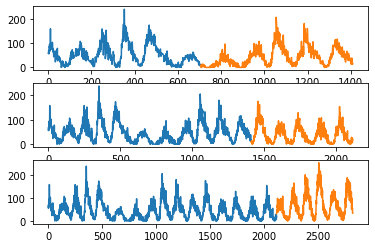

In [ ]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from matplotlib import pyplot

series = pd.read_csv('sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
# 3 splits selected
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
# Index used to create 3 separate plots
index=1
for train_index, test_index in splits.split(X):
  train = X[train_index]
  test = X[test_index]
  # Model training/eval goes here
  # In this example were just going to show train vs test data plots
  print('Combined Observations: %d' % (len(train) + len(test)))
  print('Training Observations:%d' % (len(train)))
  print('Test Observations: %d' % (len(test)))
  pyplot.subplot(310+index)
  pyplot.plot(train)
  # Add test plot onto train plot in different colour
  pyplot.plot([None for i in train] + [x for x in test])
  index += 1
pyplot.show()


**Walk Forward Validation**

Walk Forward Validation is the Gold standard of model evaluation.

Walk Forward Validation is not currently supported in sci-kit learn although you can create your own using TimeSeriesSplit

This is an example of splitting data into train and test sets using the Walk Forward Validation method

In [ ]:
import pandas as pd
series = pd.read_csv('sunspots.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
# Window size of 500 records for train
n_train = 500
n_records = len(X)
# Expanding window implemented below i.e. trained on all data, not rolling window
for i in range(n_train, n_records):
  train, test = X[0:i], X[i:i+1]
  # Model Evaluation goes here
  print('train=%d, test=%d' % (len(train), len(test)))


# Checking for Trends, Seasonality in dataset
**By checking for Normal Distribution and a consistent mean & deviation across all values**

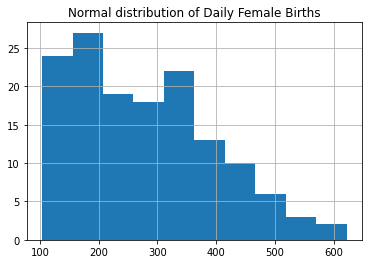

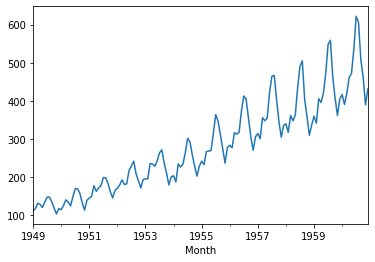

mean1=182.902778, mean2=377.694444
variance1=2244.087770, variance2=7367.962191


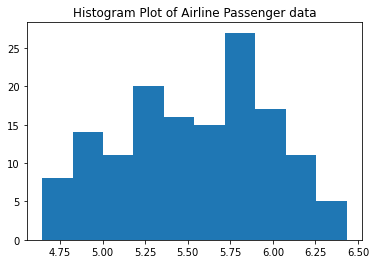

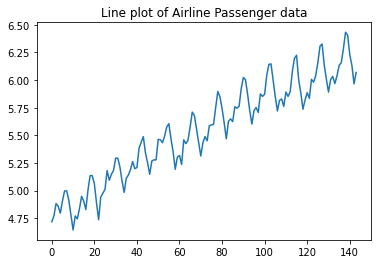

mean of Log1=182.902778, mean of Log2=377.694444
variance of Log1=2244.087770, variance of Log2=7367.962191
ADF Statistic: -1.717017
p-value: 0.422367
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


In [ ]:
import pandas as pd
from matplotlib import pyplot
import numpy as np # for numpy log function
from statsmodels.tsa.stattools import adfuller

# Compare mean and variance for Airline passenger data with Female Births
#series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
series = pd.read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

series.hist()
pyplot.title('Normal distribution of Daily Female Births')
pyplot.show()

series.plot()
pyplot.show()

# Calculate statistics of partitioned time series data
X = series.values
split = int(len(X)/2)

X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()

print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

# Obvious seasonal component to Passenger Airline data which appears is growing.
# This may suggest exponental growth from season to season.
# Log transformation can be used to flatten out exponential & change back to linear relationship.
# Below is the same plots with log tranform of the time series
LogX = np.log(X)
pyplot.hist(LogX)
pyplot.title('Histogram Plot of Airline Passenger data')
pyplot.show()
pyplot.plot(LogX)
pyplot.title('Line plot of Airline Passenger data')
pyplot.show()

# recalculate the mean & standard deviation values of the log transformed dataset 
split = int(len(X)/2)
X1Log, X2Log = X[0:split], X[split:]
meanLog1, meanLog2 = X1Log.mean(), X2Log.mean()
varLog1, varLog2 = X1Log.var(), X2Log.var()
print('mean of Log1=%f, mean of Log2=%f' % (meanLog1, meanLog2))
print('variance of Log1=%f, variance of Log2=%f' % (varLog1, varLog2))

# Now for the Augmented Dicker-Fuller analysis
#result = adfuller(X)
result = adfuller(LogX)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))

# SUMMARY
# For the Female Birth dataset we can see that the statistic value of -4 is 
# less than 1% Test statistic of -4. The more -ve this statistic the more 
# likely we are to reject the null hypothesis.
# Rejecting the null hypothesis means that the process has no unit root
# and in turn that the time series is stationary or does not have a time 
# dependant structure

# For the non-log Airline Dataset the test statistic is +ve, meaning we are 
# much less likely to reject the null hypothesis (it looks non-stationary) 
# & comparing the test statistic to the critical values, it looks like we 
# would have to fail to reject the null hypothesis that the time series is 
# non-stationary and does have time-dependent structure.

# For LogX the test statistic is -ve value & that the value is larger than 
# the critical values, again, meaning that we fail to reject the null 
# hypothesis and in turn that the time series is non-stationary.


# Seasonality Adjustment with Modeling

Coefficients: [-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]


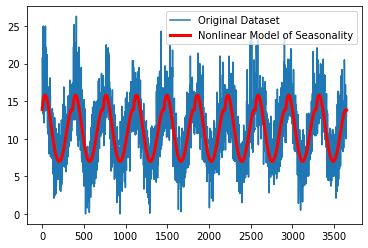

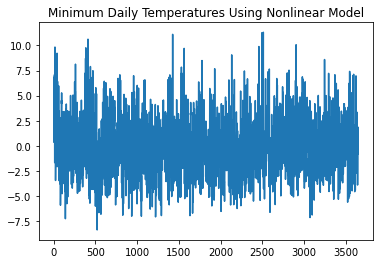

In [ ]:
# Model Seasonality with A Polynomial model
# Curve appears to be a good fit for the seasonal structure in the dataset.
# Next we can use this model to create seasonally adjusted version of dataset
import pandas as pd
import numpy as np
from matplotlib import pyplot

series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates = True, squeeze=True)

# fit Polynomial: x^2*b1 + x*b2 + ... + bn
X = [i%365 for i in range(0, len(series))]
y = series.values 
order = 4 
coef = np.polyfit(X, y, order)
print('Coefficients: %s' % coef)

# Create curve
curve = list()

for i in range(len(X)):
  value = coef[-1]
  for o in range(order):
    value += X[i]**(order-o) * coef[o]
  curve.append(value)

# Plot curve over original dataset
# This confirms curve is good match for original dataset
pyplot.plot(series.values, label ='Original Dataset')
pyplot.plot(curve, color='red', linewidth=3, label ='Nonlinear Model of Seasonality')
pyplot.legend()
pyplot.show()

# Create seasonally adjusted model by differencing with polynomial model (curve)
values = series.values
diff = list()

for i in range(len(values)):
  value = values[i] - curve[i]
  diff.append(value)

pyplot.plot(diff)
pyplot.title('Minimum Daily Temperatures Using Nonlinear Model')
pyplot.show()



# Seasonal Adjustment with Differencing

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64


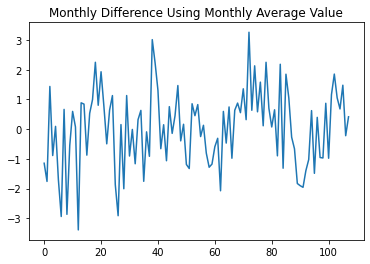

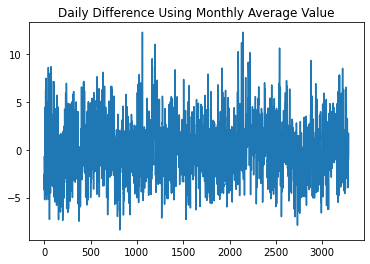

In [ ]:
# Deseasonalise a time series using monthly average value differencing
import pandas as pd
from matplotlib import pyplot

series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

print(series.head())

# Calculate monthly average for seasonal average over whole month
resample = series.resample('M')
monthly_mean = resample.mean()
X = series.values

# Calculate monthly difference using monthly average value
diff_monthly = list()
months_in_year = 12
for i in range(months_in_year, len(monthly_mean)):
  value = monthly_mean[i] - monthly_mean[i - months_in_year]
  diff_monthly.append(value)

pyplot.plot(diff_monthly)
pyplot.title("Monthly Difference Using Monthly Average Value")
pyplot.show()

# Calculate daily difference using monthly average value
diff_daily = list()
days_in_year = 365
for i in range(days_in_year, len(X)):
  month_str_last_year = str(series.index[i].year-1)+'-'+str(series.index[i].month)
  month_mean_last_year = series[month_str_last_year].mean()
  value = X[i] - month_mean_last_year
  diff_daily.append(value)

pyplot.plot(diff_daily)
pyplot.title('Daily Difference Using Monthly Average Value')
pyplot.show()



# Detrending Data by Differencing

**Difference detrending works well for data with linear trend**

If trend is quadratic (change in trend also increases/decreases) then a difference of the already differenced dataset can be taken i.e. a 2nd level of differencing

Month
2021-01-01    266.0
2021-02-01    145.9
2021-03-01    183.1
2021-04-01    119.3
2021-05-01    180.3
Name: Sales, dtype: float64


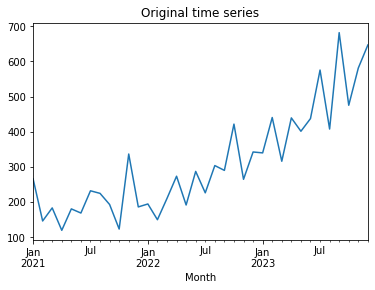

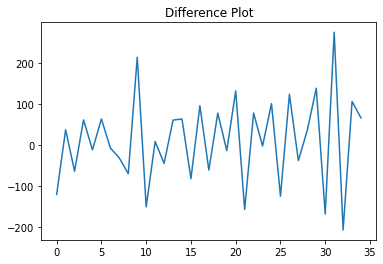

In [ ]:
# Detrend time series data using differencing
import pandas as pd
import datetime as dt
from matplotlib import pyplot

def dt_parser(x):
  return dt.datetime.strptime('202'+x, '%Y-%m')

series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=dt_parser)

X = series.values
diff = list()

for i in range(1, len(X)):
  value = X[i] - X[i-1]
  diff.append(value)

print(series.head())

#Plots original time series data (date reformated)
series.plot()
pyplot.title('Original time series')
pyplot.show()

# Plots diff detrending applied
pyplot.plot(diff)
pyplot.title('Difference Plot')
pyplot.show()


# Time Series data being split into 'Year', 'Month & 'Day' and plotted
**Explore the Distribution of observations with histograms & density plots**

How to explore the +ve/-ve temporal relationships with line plots

How to manipulate Time Series data with panda series & data frames

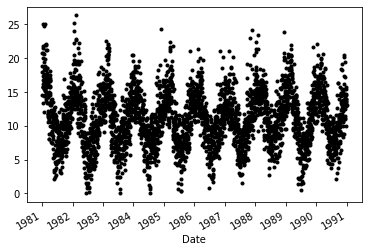

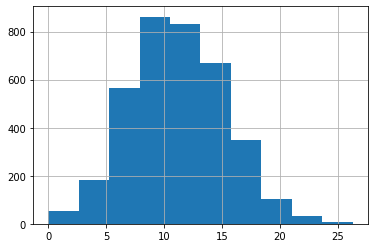

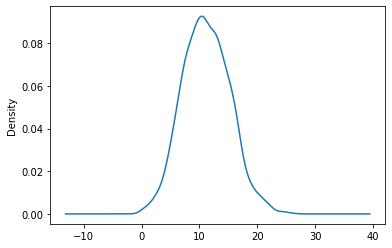

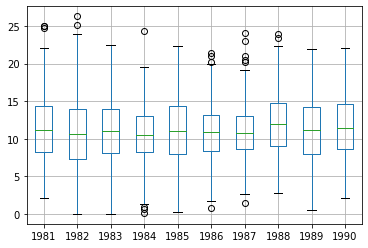

In [ ]:
import pandas as pd
from matplotlib import pyplot

series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
df = pd.DataFrame()

# Split data so transposed by year, month, day & temperature
df['year'] = [series.index[i].year for i in range(len(series))]
df['month'] = [series.index[i].month for i in range(len(series))]
df['day'] = [series.index[i].day for i in range(len(series))]
df['temperature'] = [series[i] for i in range(len(series))]

# Line/dot plot
# Plot using 'dots' instead of joining each point up with a line (line plot)
series.plot(style='k.')
pyplot.show()

# Histogram
# Produces the best possible histogram with the area under the curve equal to 1 i.e. probability density curve
# The histogram algorithm automatically selects the size of the bins (bar width) based on the spread of the 
# values in the data
series.hist()
pyplot.show()

# Density Plots (kde & Gaussian)
#series.plot(kind='kde')
series.plot.density()
pyplot.show()

# Box & Whisker Plot
# Box is drawn around the 25th & 75th percentiles of the data that captures the middle 50% of observations
# A line is drawn at the 50th percentile (the median)
# Whiskers are drawn above & below the box to summarize the general extents of the observations
# Dots/circles are drawn for outliers outside of the whiskers/extents of the data

# Group data into years & plot as box/whiskers plot
# pd.Grouper values are A:Annual, M:Monthly, D:Daily)
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
  years[name.year] = group.values
years.boxplot()
pyplot.show()


# Box Plot for 1 Year Showing Monthly plot data
**How to Explore the change in distribution of observations with box, whisker & heat map plots**

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


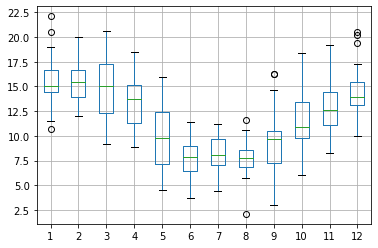

In [ ]:
# Create a boxplot of monthly data
import pandas as pd
from matplotlib import pyplot
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

one_year = series['1990']
# Group by Monthly
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()


# Heat Map Representation of Data

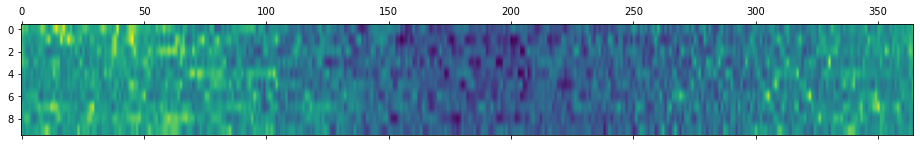

In [ ]:
import pandas as pd
from matplotlib import pyplot

# Years represented by rows & Days represetned by Columns in the plot
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# Group by A:Annual
groups = series.groupby(pd.Grouper(freq='A'))
years = pd.DataFrame()

for name, group in groups:
  years[name.year] = group.values
years = years.T

pyplot.matshow(years, interpolation=None, aspect='auto')
pyplot.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  if __name__ == '__main__':


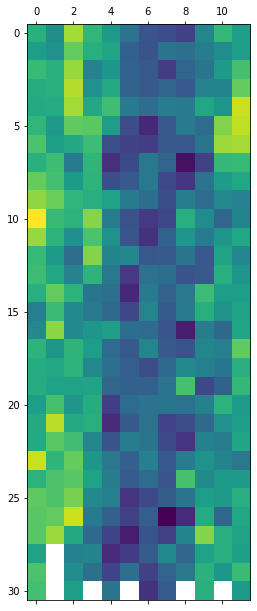

In [ ]:
import pandas as pd
from matplotlib import pyplot
series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

one_year = series['1990']
groups = one_year.groupby(pd.Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = pd.DataFrame(months)
months.column = range(1,13)

pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()


# Lag Scatter Plots - Correlation Within Last 7 Days
**How to Explore the temporal relationship with line, scatter & autocorrelation plots**

1


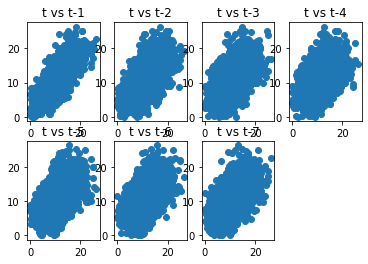

In [ ]:
import pandas as pd
from matplotlib import pyplot

series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)
values = pd.DataFrame(series.values)
lags = 7

# columns is a list object, a temp object to build y-axis columns 't-1 thro 't-7'
columns = [values]

# Prepare data for y-axis, x-axis is original t-series data
# x-axis is column 't'
# y-axis is column 't-1', 't-2', 't-3', 't-4', 't-5', 't-6' & 't-7'
for i in range(1,(lags+1)):
  columns.append(values.shift(i))
df = pd.concat(columns, axis=1)

# Now prepare column labels for df
columns = ['t']
print(len(columns))
for i in range(1,(lags+1)):
  columns.append('t-' + str(i))
df.columns = columns

pyplot.figure(1)
# Build subplots: t-1, t-2, t-3, t-4, t-5, t-6 & t-7
# t is plotted on x-axis, t-n is plotted on y-axis
for i in range(1,(lags+1)):
  ax = pyplot.subplot(240 + i)
  ax.set_title('t vs t-' + str(i))
  pyplot.scatter(x=df['t'].values, y=df['t-'+str(i)].values)
pyplot.show()


# Autocorrelation & Partial Autcorrelation Plots
Plots the strength & direction of temporal relationships & how relationships change over the lag

i.e. sinewaves like this are a strong sign of seasonality in the dataset (-ve indicates correlation in opposite seasons while +ve indicates correlation in the same season)


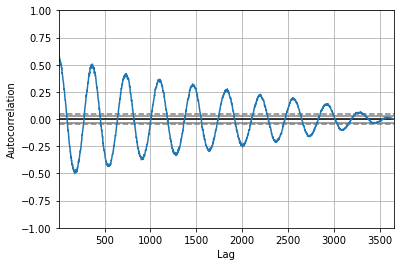

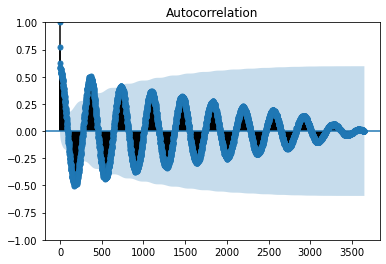

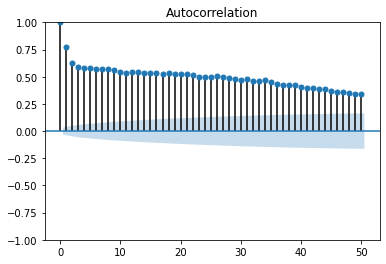

/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


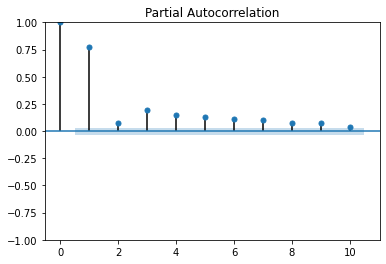

In [ ]:
import pandas as pd
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

series = pd.read_csv('daily-minimum-temperatures.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# Autocorrelation plot using Pandas
pd.plotting.autocorrelation_plot(series)
pyplot.show()

# Autocorrelation plot using statsmodels Autocorrelation plot
#plot of all observations
plot_acf(series, lags=len(series)-1)
pyplot.show()
# plot of 1st 50 observations
plot_acf(series, lags=50)
pyplot.show()

# Partial Autocorrelation plot
# Partial correlation seeks to remove influence of indirect correlations i.e. remove influence of intermediary lags
plot_pacf(series, lags=10)
pyplot.show()


# Resampling

**Upsampling - fitting in the missing gaps**

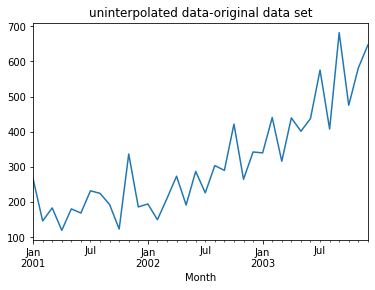

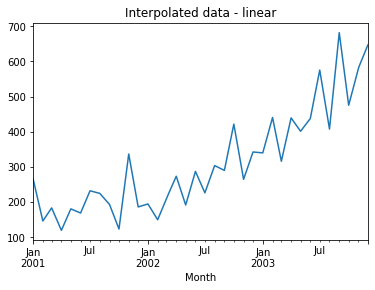

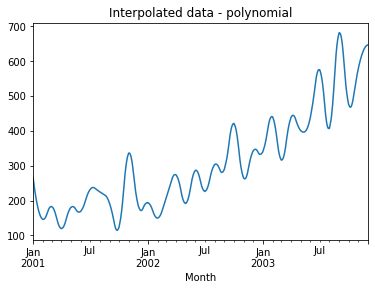

In [ ]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot

def parser(x):
  return dt.datetime.strptime('200'+x, '%Y-%m')

series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
  
upsampled = series.resample('D').mean()
interpolate_linear = upsampled.interpolate(method='linear')
interpolate_spline = upsampled.interpolate(method='spline', order=2)

# Plot based on straight line - no interpolated data
ax = series.plot()
ax.set_title('uninterpolated data-original data set')
pyplot.show()

# Plot based on straight line interplolated data - linear
ax = interpolate_linear.plot()
ax.set_title('Interpolated data - linear')
pyplot.show()

# Plot based on polynomial expression i.e. curved line
ax = interpolate_spline.plot()
ax.set_title('Interpolated data - polynomial')
pyplot.show()


**Downsampling - Less often**

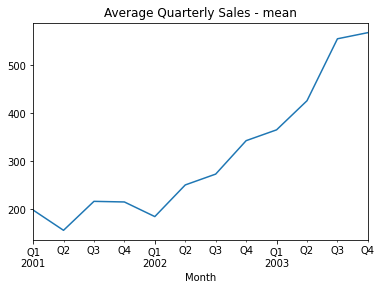

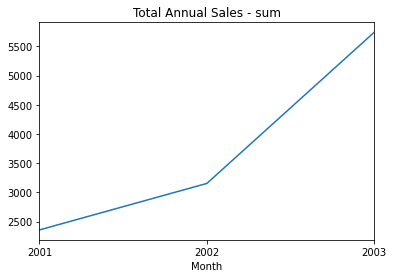

In [ ]:
import pandas as pd
import datetime as dt
from matplotlib import pyplot

def parser(x):
  return dt.datetime.strptime('200'+x, '%Y-%m')

series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)

downsample_quarterly = series.resample('Q')
downsample_annual = series.resample('A')

quarterly_mean_sales = downsample_quarterly.mean()
annual_mean_sales = downsample_annual.sum()

ax = quarterly_mean_sales.plot()
ax.set_title ('Average Quarterly Sales - mean')
pyplot.show()

ax = annual_mean_sales.plot()
ax.set_title('Total Annual Sales - sum')
pyplot.show()


# Power Transforms

**Changing the Variance using Power Transforms**

Data transforms are intended to remove noise and improve the signal in time series forecasting.

There are different types of transform:

Square root transform

Log transform

Box-Cox transform

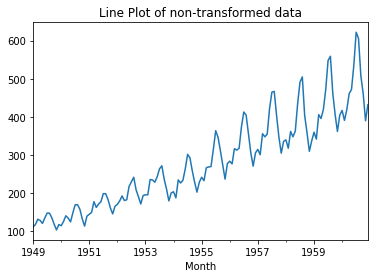

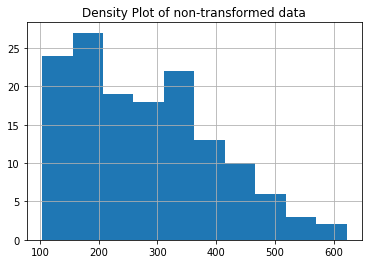

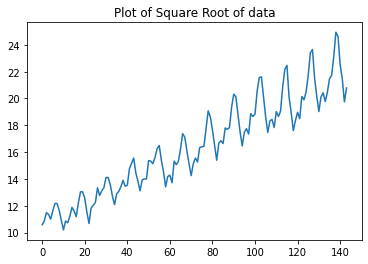

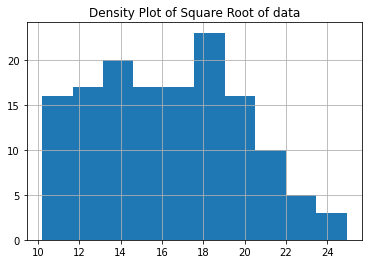

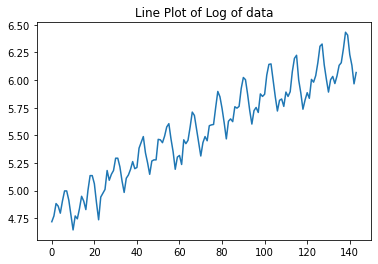

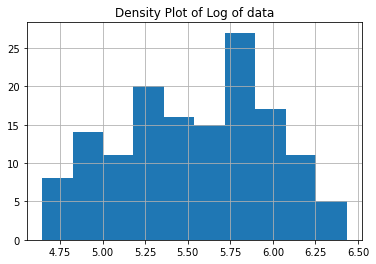

BOX COX Lamda: 0.148023


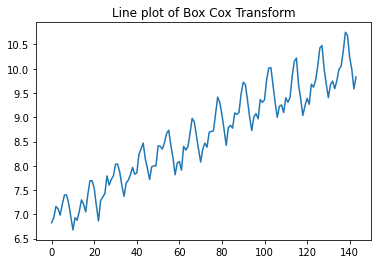

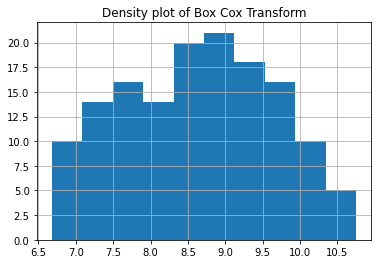

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

series = pd.read_csv('airline-passengers.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

pyplot.figure(1)

# Line plot of airline passenger data
ax = series.plot()
#ax = pyplot.subplot(211)
ax.set_title('Line Plot of non-transformed data')
#pyplot.plot(series)
pyplot.show()

# density plot of airline passenger data
bx = series.hist()
#pyplot.subplot(212)
bx.set_title('Density Plot of non-transformed data')
#pyplot.hist(series)
pyplot.show()

# Try taking the square root see if it removes the increasing variant or the sloping tail of the histogram
df1 = pd.DataFrame(series.values)
df1.columns = ['passengers']
df1['passengers'] = np.sqrt(df1['passengers'])

pyplot.figure(2)
# Line plot of Square Root
cx = df1['passengers'].plot()
#cx = pyplot.subplot(311)
cx.set_title('Plot of Square Root of data')
#pyplot.plot(df1['passengers'])
pyplot.show()

# Density plot of Square Root
dx = df1['passengers'].hist()
#pyplot.subplot(312)
dx.set_title("Density Plot of Square Root of data")
#pyplot.hist(df1['passengers'])
pyplot.show()

# Conclusion: Line plot shows linear growth and variance. Density plot more Gaussian like distribution 
# Perform log calculation
df2 = pd.DataFrame(series.values)
df2.columns = ['passengers']
df2['passengers'] = np.log(df2['passengers'])

pyplot.figure(3)
# Line plot of Log function
ex = df2['passengers'].plot()
#cx1 = pyplot.subplot(411)
ex.set_title('Line Plot of Log of data')
#pyplot.plot(df2['passengers'])
pyplot.show()

# Density plot of Log function
fx = df2['passengers'].hist()
fx.set_title('Density Plot of Log of data')
#pyplot.subplot(412)
#pyplot.hist(df2['passengers'])
pyplot.show()

# Perform Box Cox transformation, automatically optimise the transform by discovering lamda
# Conclusion: Discovering a lamda value of 0.148023 improves on the Log results above
df3 = pd.DataFrame(series.values)
df3.columns = ['passengers']
df3['passengers'], lamda = boxcox(df3['passengers'])

print('BOX COX Lamda: %f' % lamda)

# Line plot of Box Cox transformed data
gx = df3['passengers'].plot()
gx.set_title('Line plot of Box Cox Transform')
pyplot.show()

# Density plot of Box Cox transformed data
hx = df3['passengers'].hist()
hx.set_title('Density plot of Box Cox Transform')
pyplot.show()


# Smoothing Methods on Time Series Data

**Use smoothing to remove noise and better expose the signal of the underlying causal processes**

Smoothing can reduce the random variation in the observations and better expose the structure of the underlying casual processes

In [ ]:
# Result is an average of rolling window (window width = 3)
import pandas as pd
from matplotlib import pyplot

series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# tail rolling average transform

# Set the rolling window & calculate mean for rolling window
rolling = series.rolling(window=3)
rolling_mean = rolling.mean()
rolling_mean.columns = ['Date', 'Mean Value']
print(rolling_mean.head(10))

# Plot original and transformed dataset
series.plot()
rolling_mean.plot(color='red')
pyplot.show()
# Zoomed plot of 1st 100 values for original and transformed dataset
series[:100].plot()
rolling_mean[:100].plot(color='red')
pyplot.show()




**Moving Average Modeled for Feature Engineering - data presented in
(t, t-1, t-2) format**

In [ ]:
import pandas as pd

series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

df = pd.DataFrame(series.values)
width = 3
lag1 = df.shift(1)
lag3 = df.shift(width - 1)
window = lag3.rolling(window=width)
mean = window.mean()
df_cat = pd.concat([mean, lag1, df], axis=1)
df_cat.columns = ['mean', 't', 't+1']
print(df_cat.head(10))


**Moving Average data model for Machine Learning - data presented in X, y format**

In [ ]:
# Moving Average smoothing as a forcast model
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from math import sqrt

series = pd.read_csv('daily-total-female-births.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

# Prepare situation
X = series.values
window = 3
history = [X[i] for i in range(window)]
test = [X[i] for i in range(window, len(X))]
predictions = list()

# Walk forward over time steps in test
for t in range(len(test)):
  length = len(history)
  yhat= np.mean([history[i] for i in range(length-window,length)])
  obs = test[t]
  predictions.append(yhat)
  history.append(obs)
  print('predicted=%f, expected=%f' % (yhat, obs))

rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot, all values
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

# Zoomed plot, 1st 100 values
pyplot.plot(test[:100])
pyplot.plot(predictions[:100], color='red')
pyplot.show()